In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [23]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/ONGC.csv")

In [24]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ONGC,EQ,207.70,205.0,214.4,205.0,214.0,213.45,209.91,9600,2.015090e+11,NaN,NaN,NaN
1,2000-01-04,ONGC,EQ,213.45,201.5,209.7,201.0,209.0,206.55,206.26,17900,3.692030e+11,NaN,NaN,NaN
2,2000-01-05,ONGC,EQ,206.55,201.0,223.1,200.5,223.1,223.10,215.46,27000,5.817490e+11,NaN,NaN,NaN
3,2000-01-06,ONGC,EQ,223.10,234.0,234.9,217.6,217.6,219.30,223.42,35600,7.953680e+11,NaN,NaN,NaN
4,2000-01-07,ONGC,EQ,219.30,223.0,223.0,213.0,215.7,215.75,215.19,11400,2.453145e+11,NaN,NaN,NaN


In [25]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [26]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,491.156954,491.914832,500.182152,482.758509,491.102657,491.138193,491.554470,4.627373e+06,1.192360e+14,62667.979642,2.387201e+06,0.513413
std,385.181628,385.689433,392.444581,378.243050,385.088030,385.197861,385.476883,8.938633e+06,1.264207e+14,37654.192437,3.773231e+06,0.148404
min,60.000000,59.400000,63.000000,50.000000,60.200000,60.000000,61.000000,5.000000e+01,8.012500e+08,864.000000,9.970000e+02,0.082900
25%,177.462500,178.500000,180.712500,175.512500,177.475000,177.450000,177.687500,8.181695e+05,5.600668e+13,39218.250000,5.144240e+05,0.418400
50%,305.400000,306.000000,310.000000,301.725000,305.500000,305.400000,306.135000,2.082784e+06,9.902516e+13,53557.000000,1.271286e+06,0.532900
75%,845.125000,844.900000,859.300000,830.000000,844.775000,845.125000,845.655000,4.839795e+06,1.548728e+14,75618.500000,2.979299e+06,0.619300
max,1484.200000,1480.550000,1513.900000,1443.150000,1490.100000,1484.200000,1482.260000,1.785935e+08,4.348316e+15,364976.000000,9.587384e+07,1.000000


In [27]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [28]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [29]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [30]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [31]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [32]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [33]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,3.121951,-2.327791,102.80,11797791,NaN
5302,1.167315,0.389105,103.20,8886250,NaN
5303,1.064860,0.144578,103.90,6887787,NaN
5304,2.269435,-0.810296,104.05,14990087,NaN
5305,9.099710,3.840614,108.15,81358264,NaN


In [34]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_9868\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [35]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [36]:
#Define the prediction model
model = RandomForestRegressor()

In [37]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9324300295162026


In [39]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [40]:
predictions = model.predict(X_Check)

In [41]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

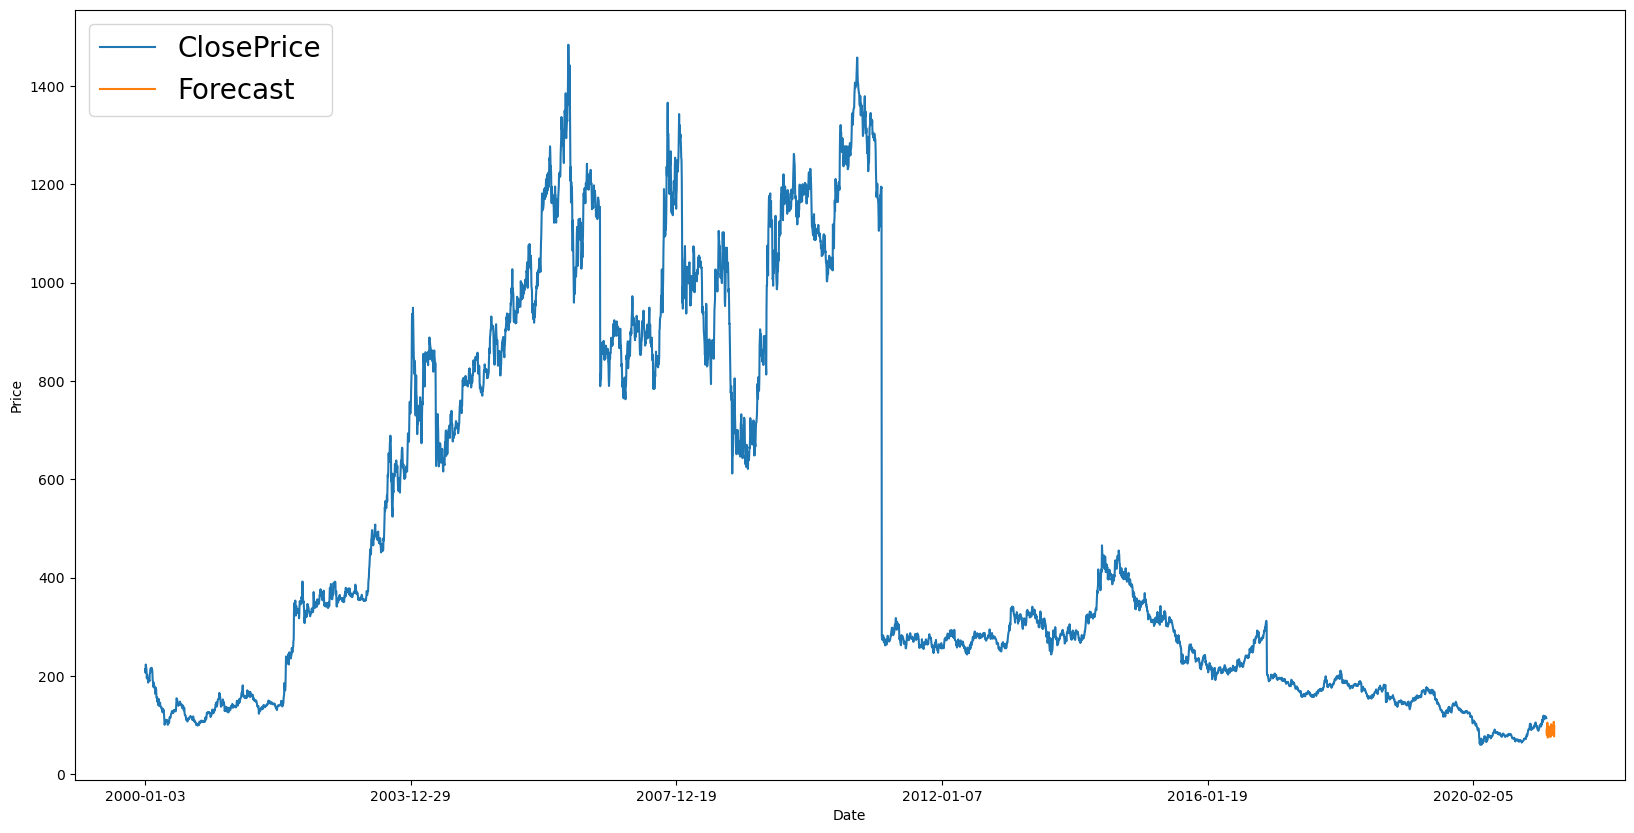

In [42]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')